In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import cv2
%matplotlib inline

2022-11-02 22:21:57.300673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv('playing cards.csv')
train

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
...,...,...,...,...,...
8024,51,valid/two of spades/1.jpg,two of spades,two,valid
8025,51,valid/two of spades/2.jpg,two of spades,two,valid
8026,51,valid/two of spades/3.jpg,two of spades,two,valid
8027,51,valid/two of spades/4.jpg,two of spades,two,valid


In [3]:
def random_selection(df=train):
    rand_idx = np.random.randint(0, df.shape[0] - 1)
    row = df.loc[rand_idx, :]
    image = cv2.imread(str(row['filepaths'])) / 255.
    return image

In [4]:
def data_loader(batch_size=16, df=train):
    while True:
        images = np.zeros((batch_size, 224, 224, 3))
        
        for i in range(batch_size):
            image = random_selection(df=train)
            
            images[i] = image
        
        yield {'images': images}

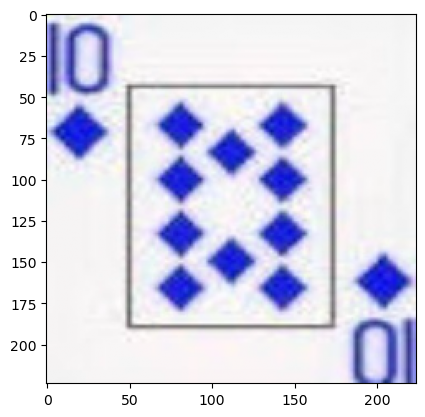

In [5]:
image = next(data_loader(batch_size = 1))
images = image['images'][0]
plt.imshow(images)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'train/'
validation_dir = 'valid/'
test_dir = 'test/'

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = False
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = False
)

Found 7509 images belonging to 52 classes.
Found 260 images belonging to 52 classes.
Found 260 images belonging to 52 classes.


In [7]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(52, activation='softmax'))

2022-11-02 22:22:20.402133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(lr=1e-4),
    metrics = ['acc']
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history = model.fit(
      train_generator,
      batch_size = 16,
      epochs=7,
      validation_data=validation_generator)

Epoch 1/7
470/470 [==============================] - 309s 653ms/step - loss: 3.9366 - acc: 0.0240 - val_loss: 3.7041 - val_acc: 0.1192
Epoch 2/7
470/470 [==============================] - 292s 620ms/step - loss: 3.3510 - acc: 0.1406 - val_loss: 2.4245 - val_acc: 0.3115
Epoch 3/7
470/470 [==============================] - 1093s 2s/step - loss: 2.4974 - acc: 0.2926 - val_loss: 1.9033 - val_acc: 0.3846
Epoch 4/7
470/470 [==============================] - 601s 1s/step - loss: 2.1738 - acc: 0.3597 - val_loss: 1.6270 - val_acc: 0.4885
Epoch 5/7
470/470 [==============================] - 511s 1s/step - loss: 1.9139 - acc: 0.4248 - val_loss: 1.3881 - val_acc: 0.5577
Epoch 6/7
470/470 [==============================] - 508s 1s/step - loss: 1.6461 - acc: 0.5224 - val_loss: 1.2431 - val_acc: 0.6308
Epoch 7/7
470/470 [==============================] - 511s 1s/step - loss: 1.4081 - acc: 0.6007 - val_loss: 1.1087 - val_acc: 0.6923


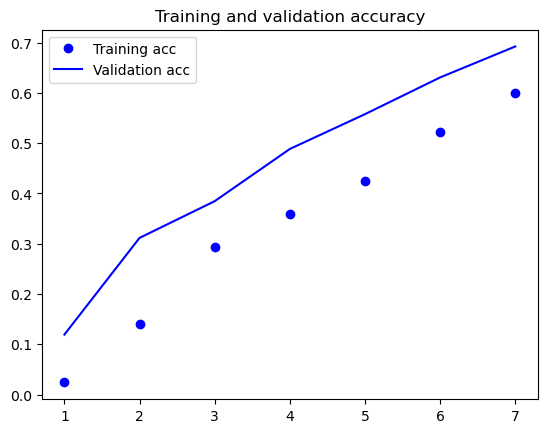

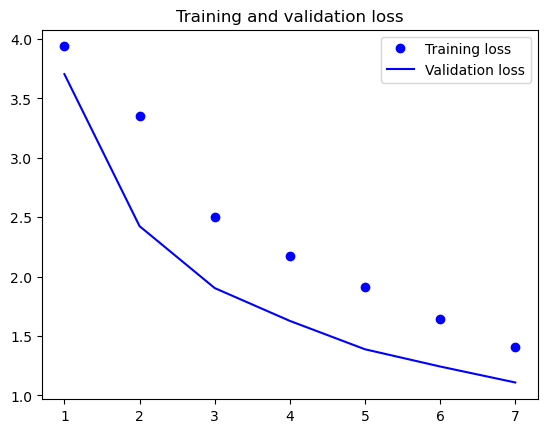

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(test_generator)
predictions

17/17 [==============================] - 4s 181ms/step


array([[3.3643473e-02, 1.4986281e-05, 8.9334579e-05, ..., 2.2917095e-04,
        7.4856657e-06, 5.3670174e-03],
       [9.2279041e-01, 2.7971610e-04, 8.3173357e-04, ..., 1.5868280e-06,
        1.6666912e-05, 7.1775168e-04],
       [5.0742310e-01, 5.5097197e-03, 2.0943922e-03, ..., 7.5324555e-05,
        1.0237245e-04, 2.3279591e-04],
       ...,
       [1.8314330e-06, 7.4543914e-06, 4.1172225e-05, ..., 1.8111749e-02,
        4.5488914e-03, 7.0997649e-01],
       [4.3621124e-04, 1.1819408e-03, 7.9719559e-04, ..., 3.1722818e-02,
        4.0112413e-02, 4.2266506e-01],
       [2.1248791e-04, 2.8133931e-04, 4.6571885e-04, ..., 6.4390921e-04,
        5.3349120e-04, 1.5370783e-03]], dtype=float32)

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

17/17 [==============================] - 4s 207ms/step - loss: 1.2414 - acc: 0.6615


0.6615384817123413

## VGG16

In [14]:
from keras.applications import VGG16

conv_base = VGG16(include_top=False, weights='imagenet')
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [15]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 16

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_count, 52))

    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150),
        batch_size=batch_size, 
        class_mode='categorical')
        
    i=0
    for inputs_batch, labels_batch in generator:
        print(i)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= (sample_count - batch_size):
            break
    return features, labels


In [16]:
train_features, train_labels = extract_features(train_dir, len(np.where(train['data set'] == 'train')[0]))
validation_features, validation_labels = extract_features(validation_dir, len(np.where(train['data set'] == 'valid')[0])) 
test_features, test_labels = extract_features(test_dir, len(np.where(train['data set'] == 'valid')[0]))

Found 7509 images belonging to 52 classes.
0
1/1 [==============================] - 3s 3s/step
1
1/1 [==============================] - 3s 3s/step
2
1/1 [==============================] - 3s 3s/step
3
1/1 [==============================] - 5s 5s/step
4
1/1 [==============================] - 4s 4s/step
5
1/1 [==============================] - 4s 4s/step
6
1/1 [==============================] - 4s 4s/step
7
1/1 [==============================] - 4s 4s/step
8
1/1 [==============================] - 3s 3s/step
9
1/1 [==============================] - 3s 3s/step
10
1/1 [==============================] - 2s 2s/step
11
1/1 [==============================] - 3s 3s/step
12
1/1 [==============================] - 2s 2s/step
13
1/1 [==============================] - 2s 2s/step
14
1/1 [==============================] - 2s 2s/step
15
1/1 [==============================] - 3s 3s/step
16
1/1 [==============================] - 3s 3s/step
17
1/1 [==============================] - 5s 5s/step
18
1/1 [=====

In [17]:
train_features = np.reshape(train_features, (len(np.where(train['data set'] == 'train')[0]), 4 * 4 * 512))
validation_features = np.reshape(validation_features, (len(np.where(train['data set'] == 'valid')[0]), 4 * 4 * 512))
test_features = np.reshape(test_features, (len(np.where(train['data set'] == 'test')[0]), 4 * 4 * 512))

In [18]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(52, activation = 'softmax'))
model.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
470/470 [==============================] - 14s 26ms/step - loss: 3.8292 - acc: 0.0752 - val_loss: 3.3180 - val_acc: 0.2538
Epoch 2/100
470/470 [==============================] - 14s 30ms/step - loss: 3.3155 - acc: 0.1782 - val_loss: 2.8626 - val_acc: 0.3577
Epoch 3/100
470/470 [==============================] - 14s 29ms/step - loss: 2.9769 - acc: 0.2513 - val_loss: 2.5270 - val_acc: 0.4346
Epoch 4/100
470/470 [==============================] - 12s 26ms/step - loss: 2.7177 - acc: 0.3154 - val_loss: 2.2767 - val_acc: 0.4692
Epoch 5/100
470/470 [==============================] - 13s 27ms/step - loss: 2.5166 - acc: 0.3572 - val_loss: 2.0905 - val_acc: 0.5192
Epoch 6/100
470/470 [==============================] - 12s 25ms/step - loss: 2.3322 - acc: 0.4120 - val_loss: 1.9296 - val_acc: 0.5615
Epoch 7/100
470/470 [==============================] - 12s 25ms/step - loss: 2.2102 - acc: 0.4327 - val_loss: 1.8214 - val_acc: 0.5731
Epoch 8/100
470/470 [==============================] - 

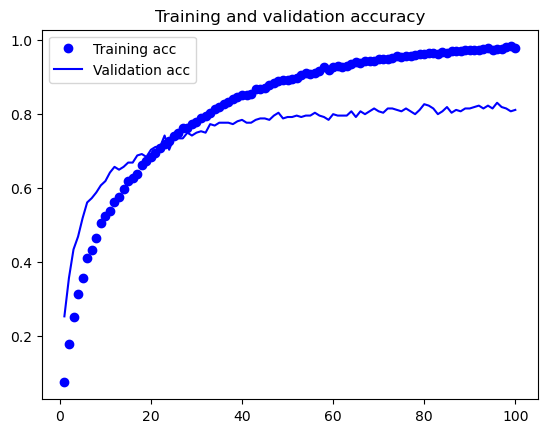

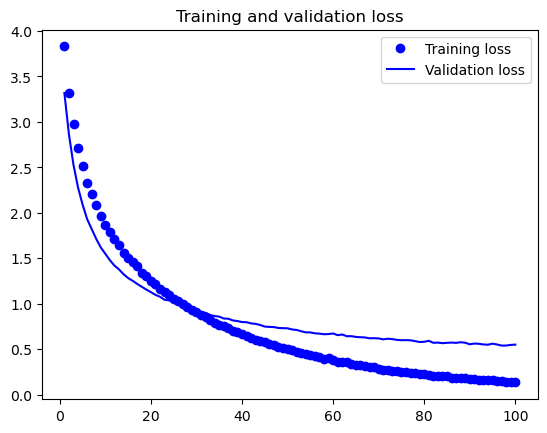

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
model.save('card_detection.h5')

In [22]:
predictions = model.predict(test_features)
predictions

9/9 [==============================] - 0s 5ms/step


array([[2.0960331e-04, 5.8662300e-07, 1.2919190e-07, ..., 6.6597971e-07,
        1.2425776e-06, 3.6769913e-07],
       [7.0296489e-09, 2.0734362e-06, 1.7915573e-06, ..., 7.3869541e-07,
        9.8357702e-07, 1.8532224e-07],
       [1.0174185e-05, 9.9300166e-07, 7.3406864e-07, ..., 5.6996237e-06,
        1.1587382e-05, 1.7565515e-04],
       ...,
       [1.8893998e-02, 1.8833902e-02, 1.8941056e-02, ..., 1.8852666e-02,
        1.9288139e-02, 1.9475363e-02],
       [1.8893998e-02, 1.8833902e-02, 1.8941056e-02, ..., 1.8852666e-02,
        1.9288139e-02, 1.9475363e-02],
       [1.8893998e-02, 1.8833902e-02, 1.8941056e-02, ..., 1.8852666e-02,
        1.9288139e-02, 1.9475363e-02]], dtype=float32)

In [24]:
test_loss, test_acc = model.evaluate(test_features, test_labels)

9/9 [==============================] - 0s 6ms/step - loss: 0.6903 - acc: 0.8000
